### Abstract

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Import Libraries</p>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from joblib import parallel_backend
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Load Dataset</p>

In [202]:
df = pd.read_csv('Book1.csv')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Dataset Overview</p>

In [203]:
pd.set_option('display.max_columns', None)
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10327,25,student,single,high.school,no,yes,yes,telephone,jun,mon,100,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228,no
14882,25,services,divorced,high.school,no,yes,no,cellular,jul,wed,158,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228,no
34833,32,admin.,single,unknown,no,yes,no,cellular,may,fri,235,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099,no
14380,23,services,single,high.school,no,no,no,telephone,jul,mon,821,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,no
24433,46,admin.,married,high.school,no,no,no,cellular,nov,mon,504,1,999,1,failure,-0.1,93.200,-42.0,4.191,5196,no
22989,37,technician,married,professional.course,no,no,no,cellular,aug,mon,163,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,no
7190,33,admin.,married,high.school,no,yes,no,telephone,may,thu,764,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191,no
6416,29,services,married,high.school,no,yes,no,telephone,may,wed,121,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6994,37,admin.,married,high.school,no,no,yes,telephone,may,thu,155,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191,no
40787,33,admin.,married,university.degree,no,yes,yes,telephone,sep,wed,396,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4964,yes


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Observation
* **41188 rows**
* **21 columns**
    - 4 as float64
    - 6 as int64
    - 11 as object
* **There is no missing value**

In [205]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Summary Statistics</p>

In [206]:
df.describe(include = ["object"]).transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [207]:
df['duration'] = np.where(df['duration']>1000,1000,df['duration'])

In [208]:
df.describe(percentiles =[.25, .50, .75, .99]).transpose()

,count,mean,std,min,25%,50%,75%,99%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,71.000,98.000
duration,41188.0,250.076357,218.950119,0.000,102.000,180.000,319.000,1000.000,1000.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,14.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,2.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.465,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,4.968,5.045
nr.employed,41188.0,5167.019010,72.178074,4964.000,5099.000,5191.000,5228.000,5228.000,5228.000


<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Handling Duplicates</p>

In [209]:
df.duplicated().sum()

13

In [210]:
df = df.drop_duplicates(keep ='last')

In [211]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          996
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Correation Analysis</p>

In [212]:
df.loc[(df.y == "yes"),"y"] = 1 # 0 means subscribed no 1 means yes
df.loc[(df.y == "no") ,"y"] = 0
df['y'] = df['y'].astype('int64')

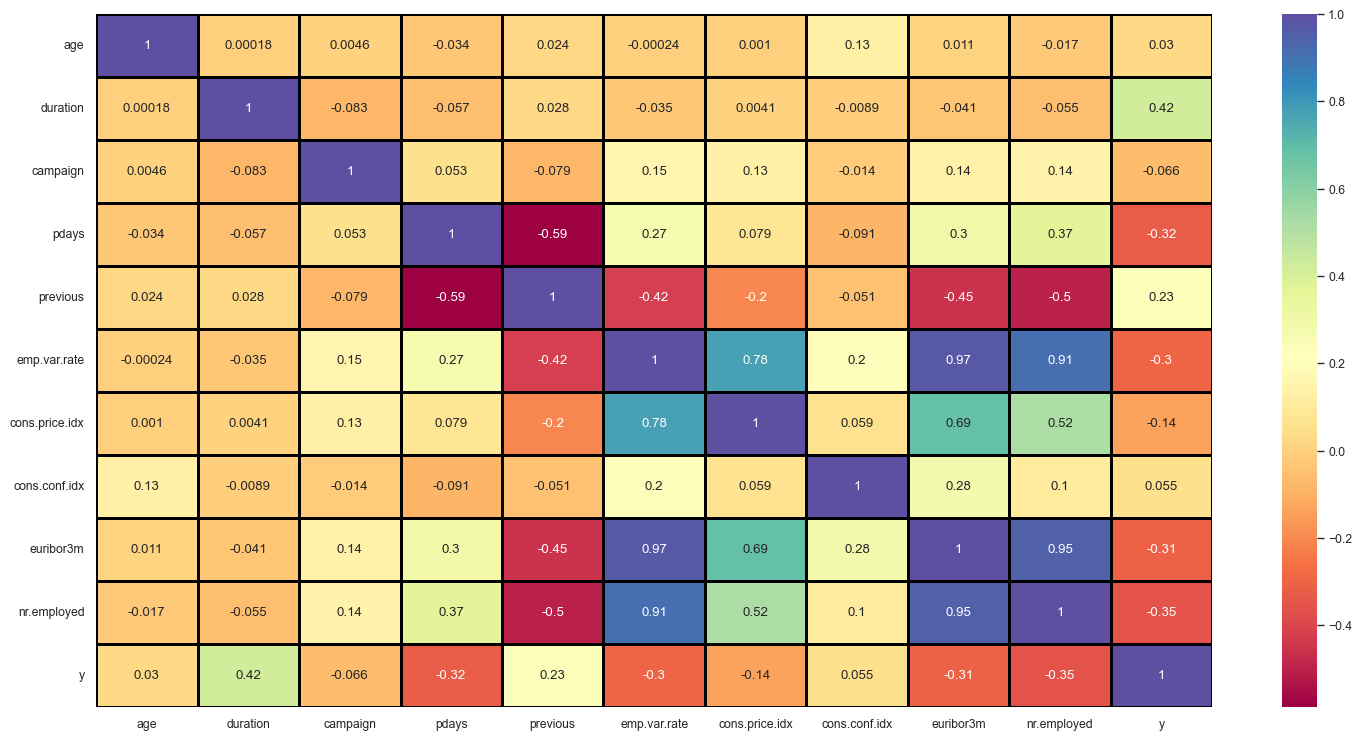

In [213]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(numeric_only=True),annot = True, cmap='Spectral',linewidths = 1, linecolor = '#000000')
sns.set(font_scale=0.8)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Categorical Feature Analysis</p>

In [214]:
df.select_dtypes('object').columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [215]:
df['job'].value_counts()

job
admin.           10419
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [216]:
df['marital'].value_counts()

marital
married     24920
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [217]:
df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6044
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [218]:
df['default'].value_counts()

default
no         32576
unknown     8596
yes            3
Name: count, dtype: int64

In [219]:
df['loan'].value_counts()

loan
no         33937
yes         6248
unknown      990
Name: count, dtype: int64

In [220]:
df['contact'].value_counts()

contact
cellular     26134
telephone    15041
Name: count, dtype: int64

In [221]:
df['poutcome'].value_counts()

poutcome
nonexistent    35550
failure         4252
success         1373
Name: count, dtype: int64

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:85%; color:white; text-align:center; border-radius:10px 10px; padding:7px">Categorical Features Proportions</p>

In [222]:
def counts_plot(feate, colr="w", ax=None):
    feate_counts = (
        df.loc[:, feate]
        .value_counts()
        .reset_index()
        .rename(columns={"index": feate})
        .assign(
            percent=lambda x: (x["count"] / x["count"].sum()).round(2) * 100
        )
    )
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=feate_counts,
        x="percent",
        y=feate,
        color='darkturquoise',
        ax=ax,
        order=feate_counts[feate],
    )
    values1 = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values1]
    sns.color_palette("Spectral",as_cmap=True)
    ax0.bar_label(ax0.containers[0], labels=labels, fontsize=9, color="#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize=10)
    ax0.set_title(str.title(feate) + " | proportions ", fontsize=10)
    return


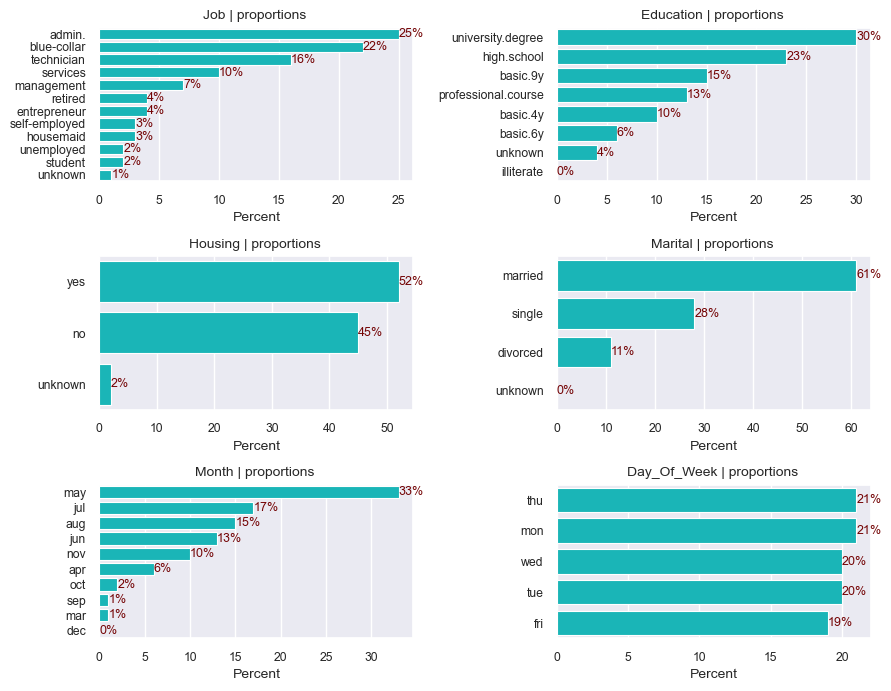

In [223]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(9, 7))
counts_plot("job", ax=ax1, colr='darkturquoise')
counts_plot("education", ax=ax2, colr='darkturquoise')
counts_plot("housing", ax=ax3, colr="#4C55E8")
counts_plot("marital", ax=ax4, colr="#5B65FF")
counts_plot("month", ax=ax5, colr="#5B65FF")
counts_plot("day_of_week", ax=ax6, colr="#5B65FF")
fig.tight_layout()
plt.show()

In [224]:
Cat_Features = ['job', 'education', 'housing', 'marital','day_of_week','month']
Target = 'y'

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:85%; color:white; text-align:center; border-radius:10px 10px; padding:7px">Categorical Features Vs Target</p>

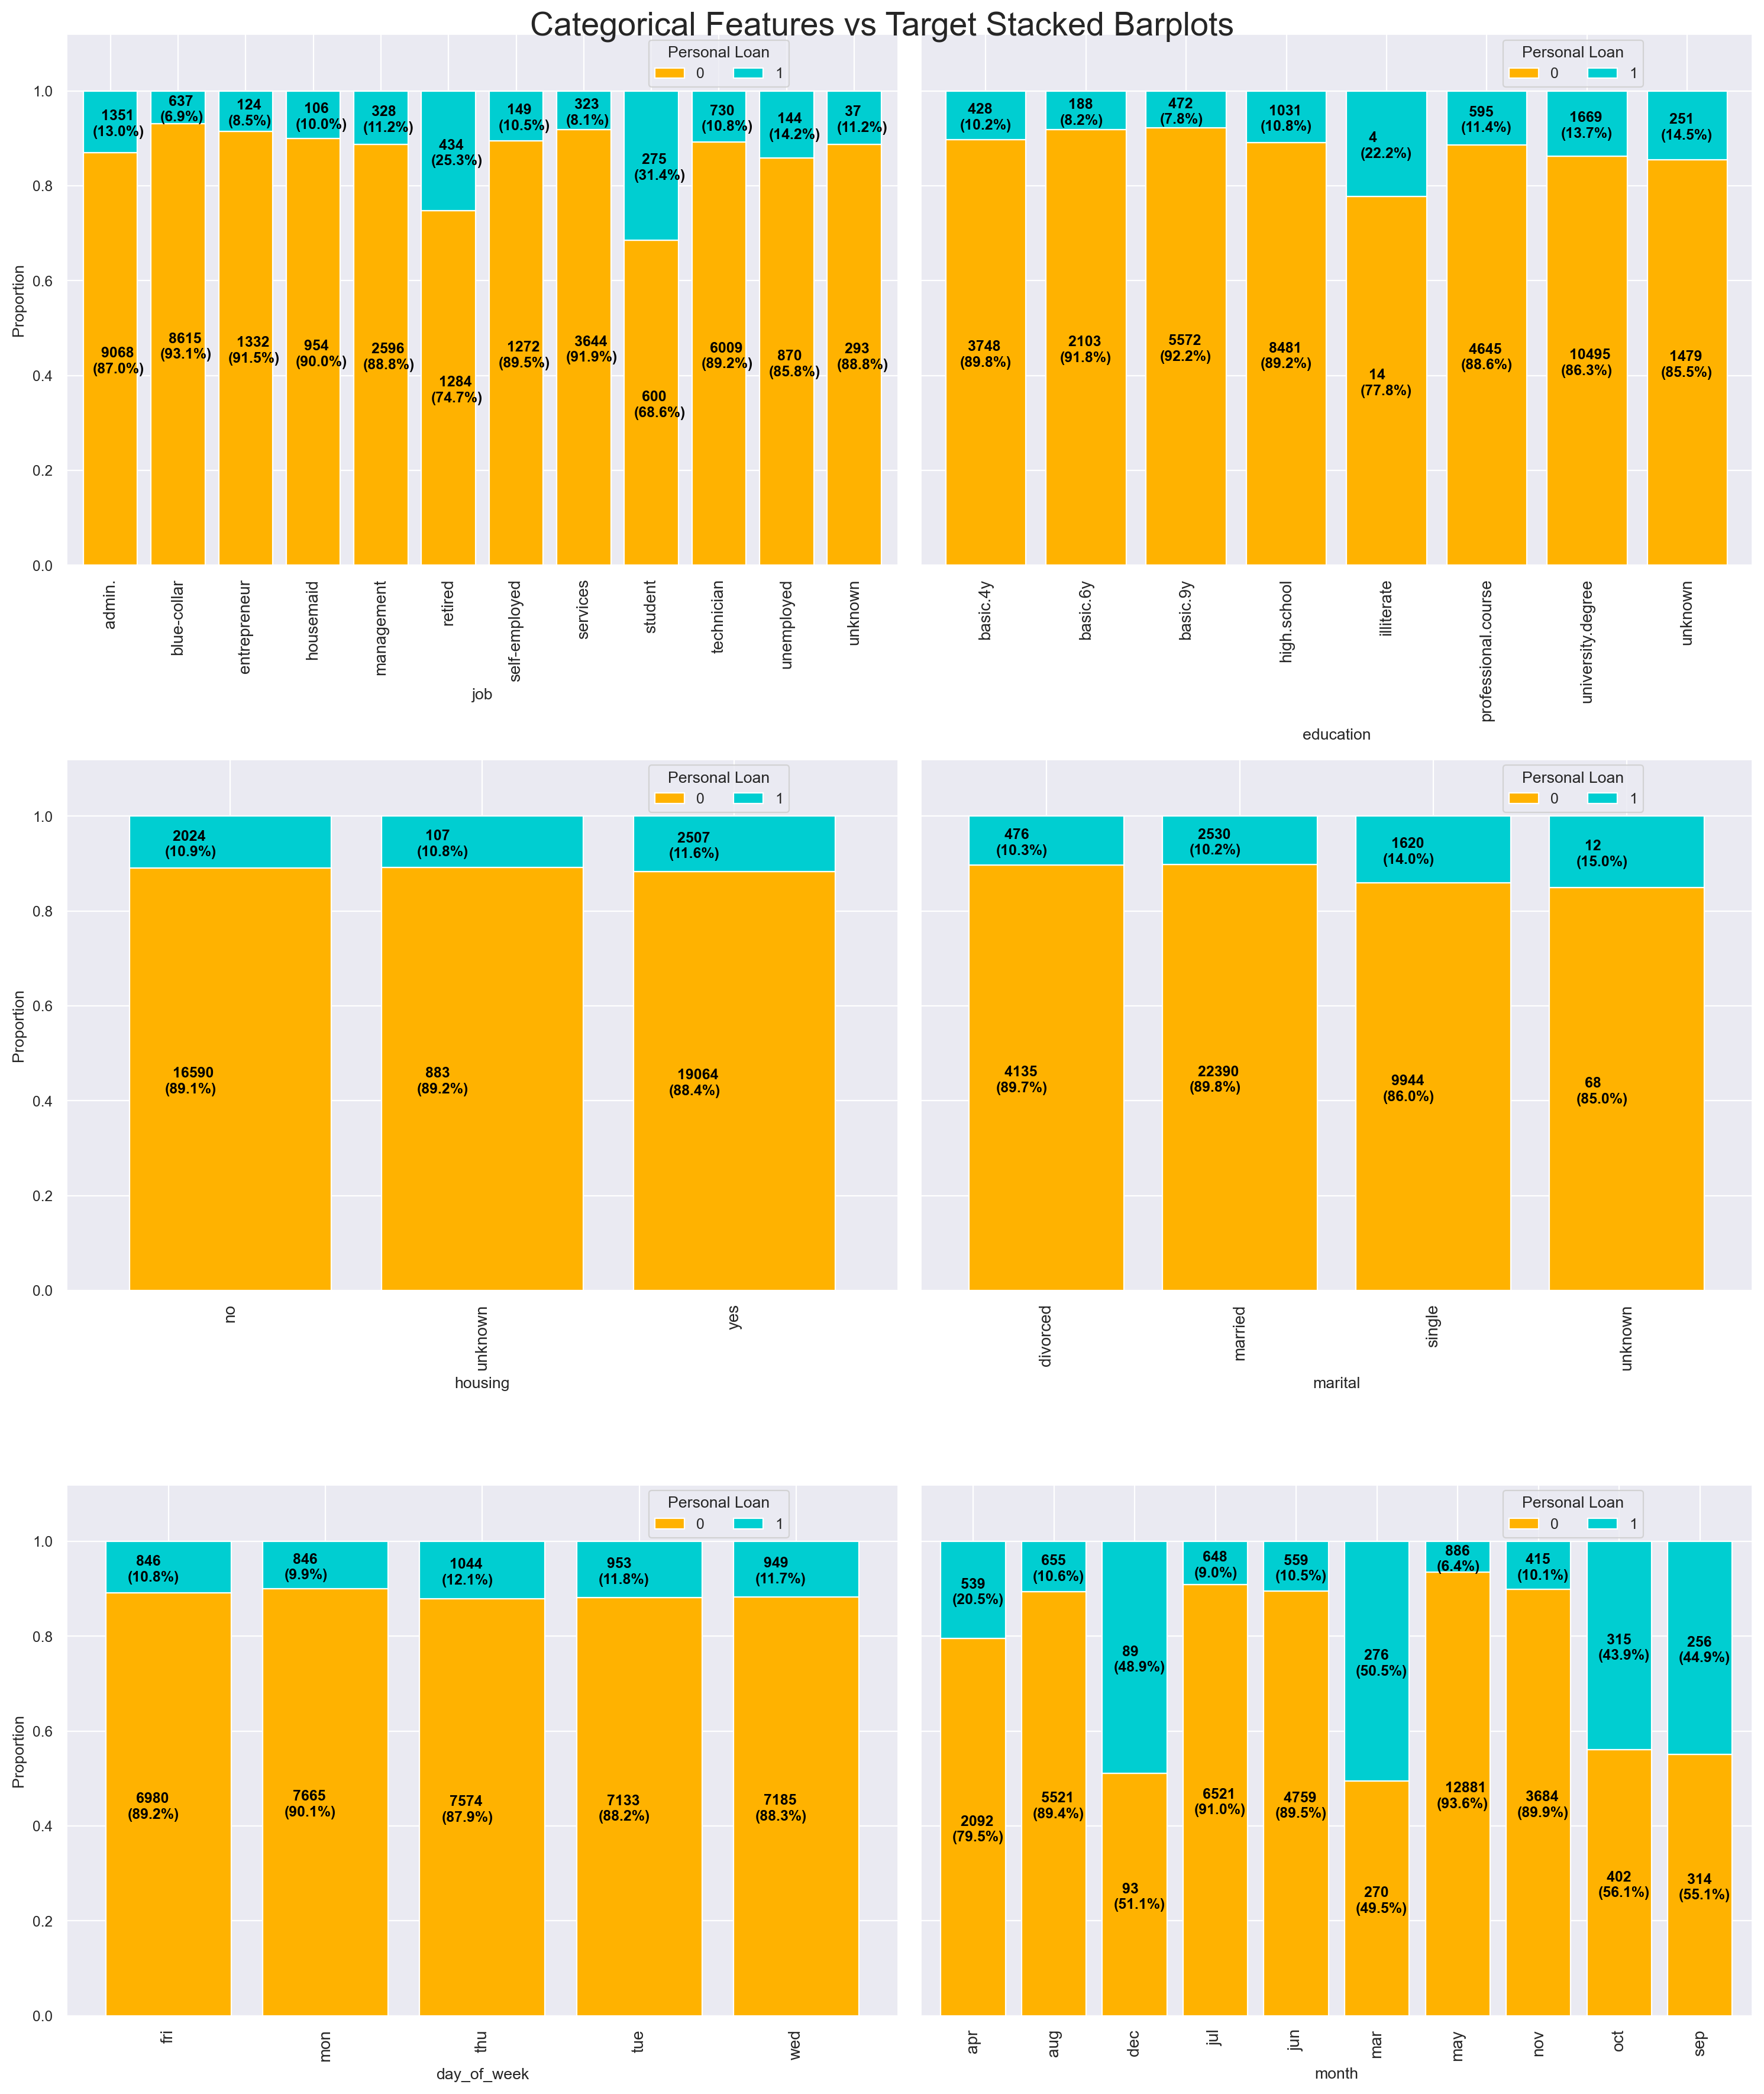

In [225]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,18), dpi=200)


for i,col in enumerate (Cat_Features):
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#FFB200','darkturquoise'])
    # Plot stacked bar charts
    x, y = i//2,i%2
    
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.26, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=9, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(),fontsize = 10, rotation=90)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=20)
plt.tight_layout()                     
plt.show()

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:85%; color:white; text-align:center; border-radius:10px 10px; padding:7px">Categorical Features Proportions</p>

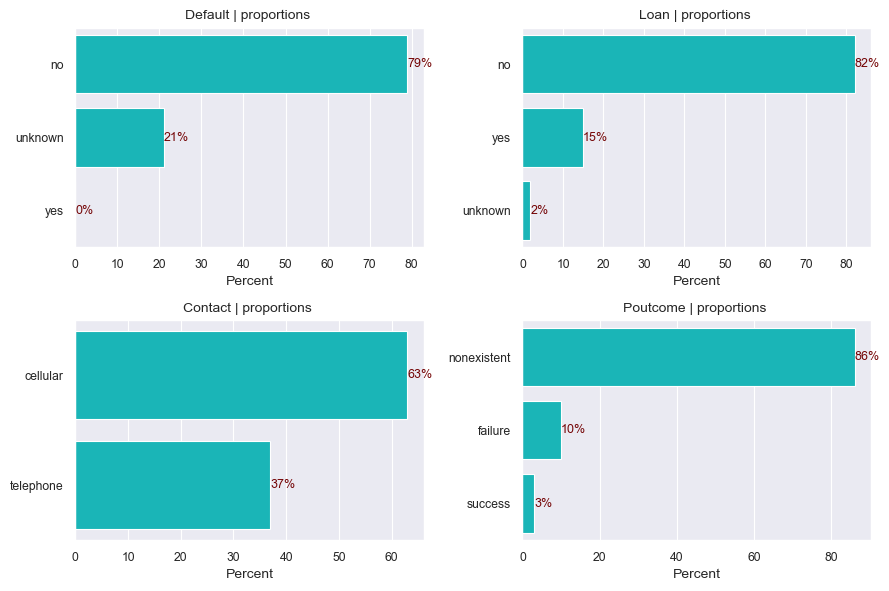

In [226]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6))
counts_plot("default", ax=ax1, colr='darkturquoise')
counts_plot("loan", ax=ax2, colr='darkturquoise')
counts_plot("contact", ax=ax3, colr="#4C55E8")
counts_plot("poutcome", ax=ax4, colr="#5B65FF")
fig.tight_layout()
plt.show()

In [227]:
Cat_Features = ['default','loan','contact','poutcome']

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:85%; color:white; text-align:center; border-radius:10px 10px; padding:7px">Categorical Features Vs Target</p>

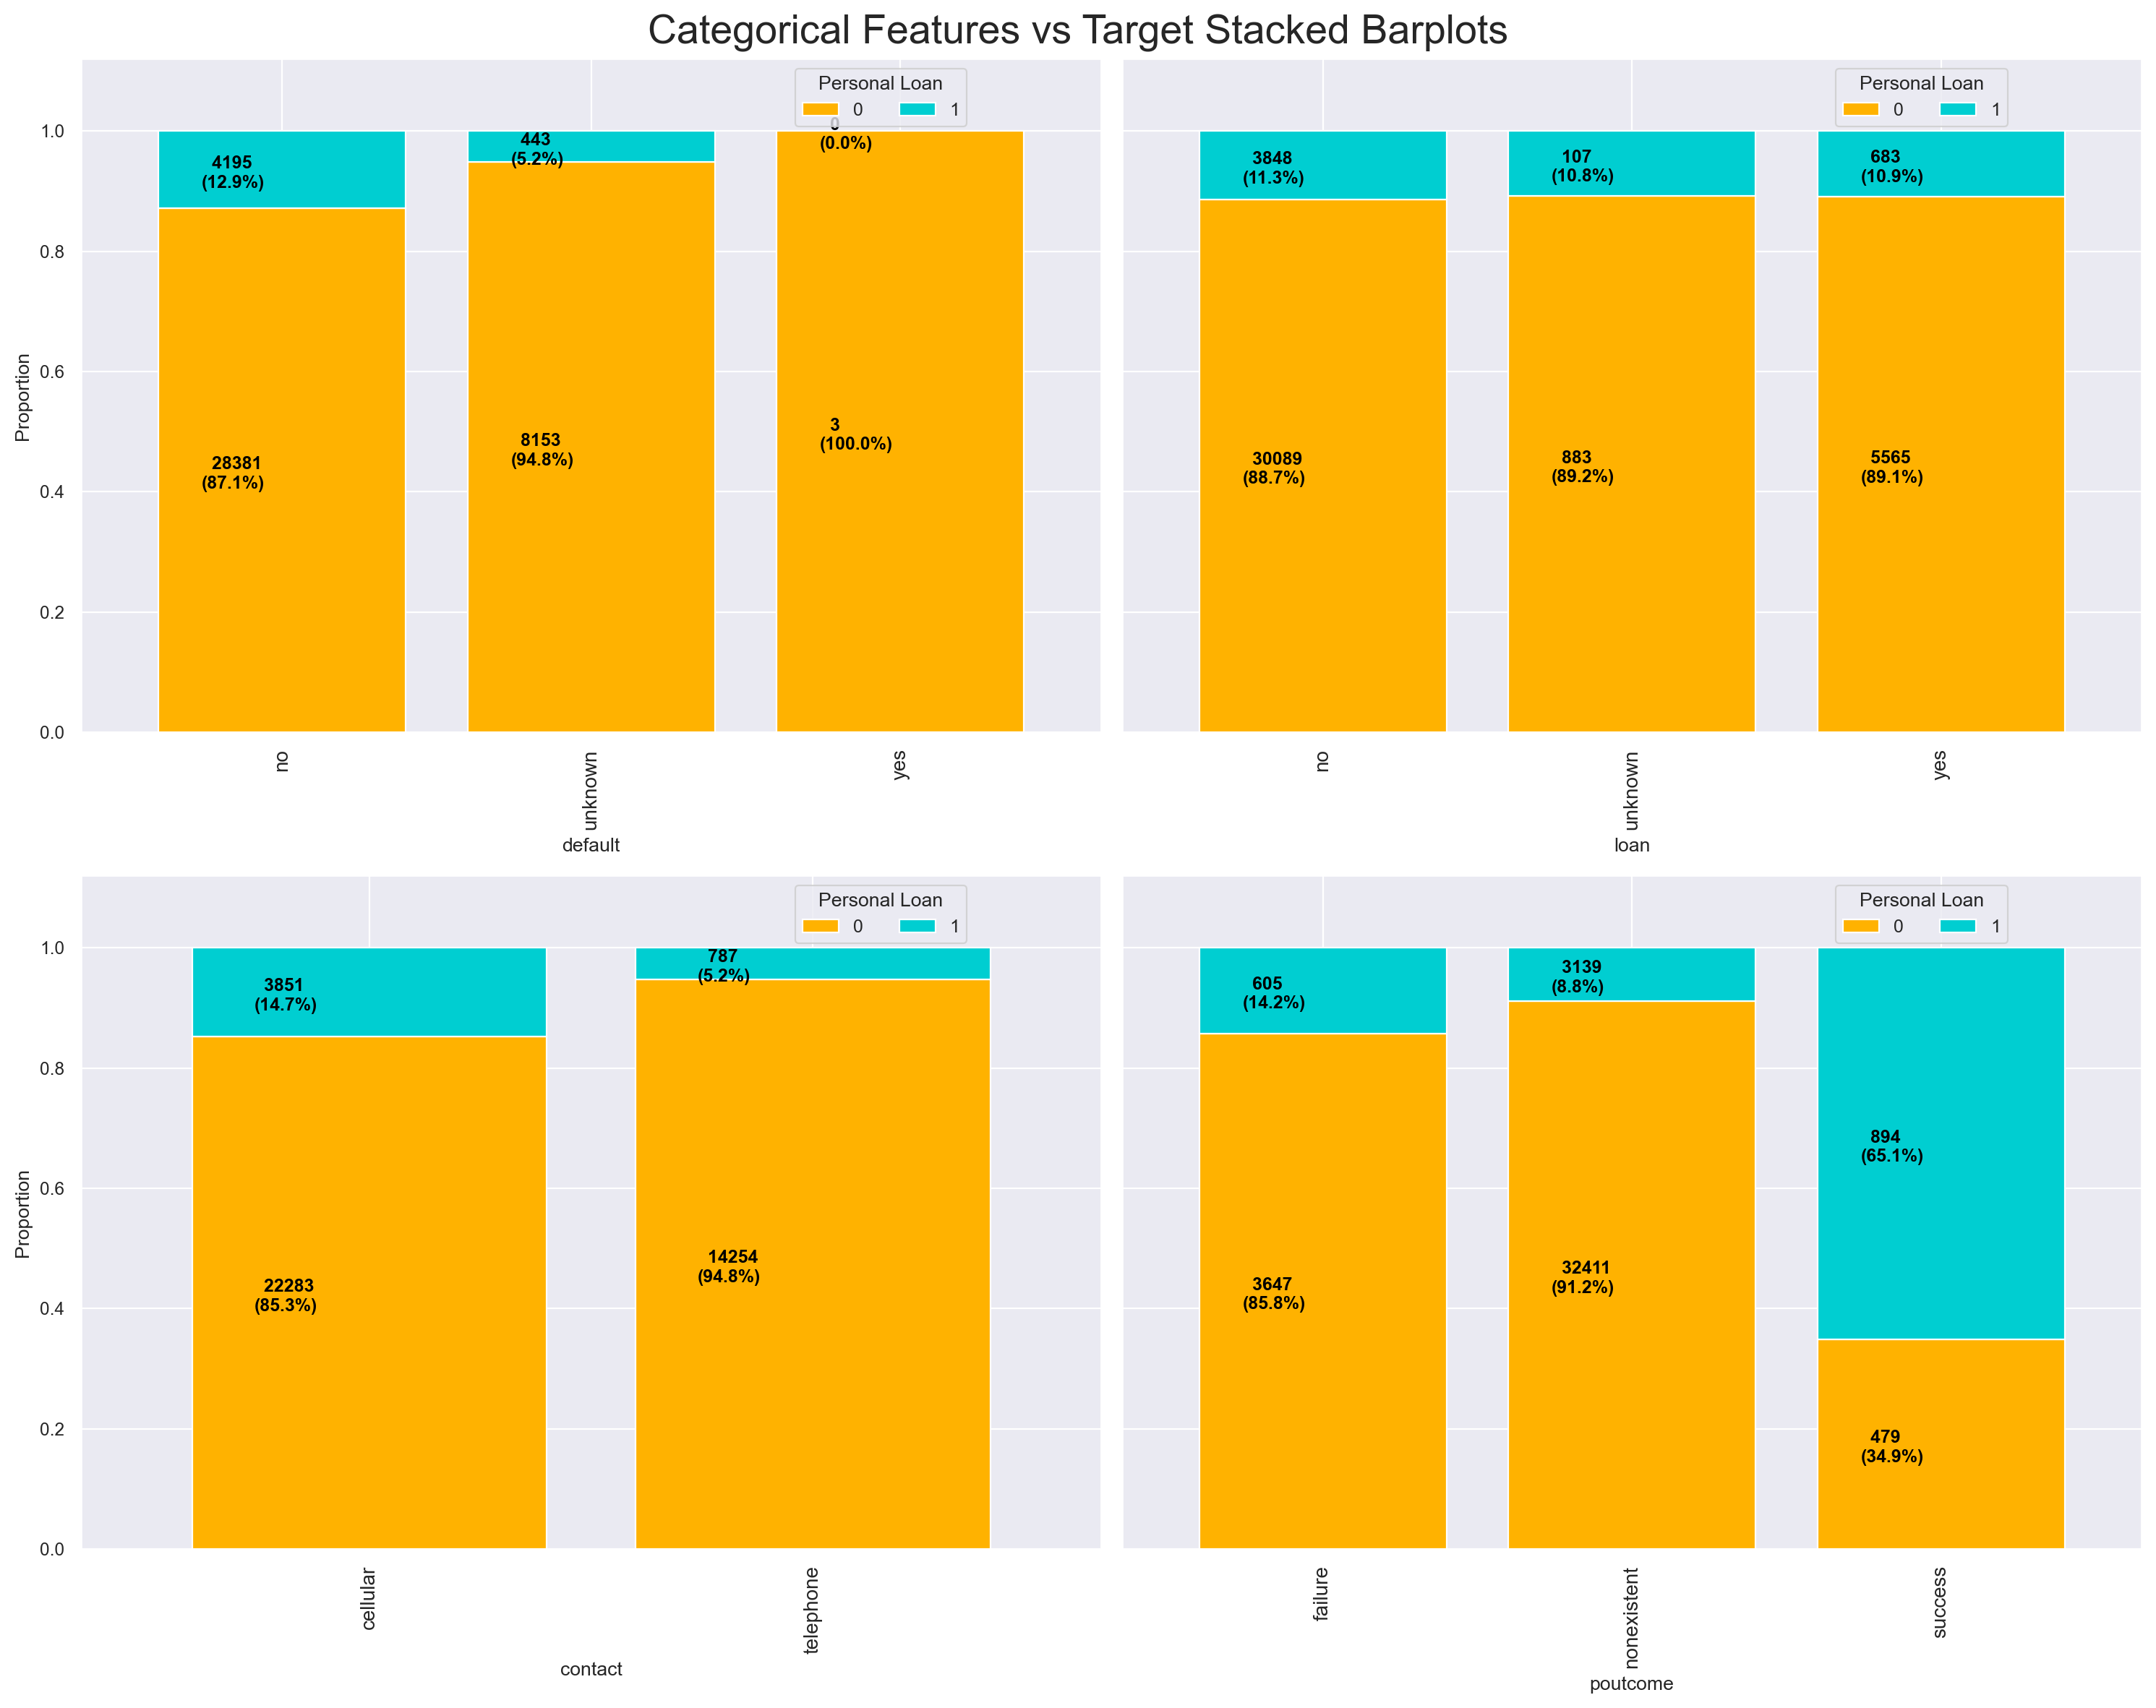

In [228]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12), dpi=200)


for i,col in enumerate (Cat_Features):
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#FFB200','darkturquoise'])
    # Plot stacked bar charts
    x, y = i//2,i%2
    
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.26, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=9, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(),fontsize = 10, rotation=90)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=20)
plt.tight_layout()                     
plt.show()

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Numerical Feature Analysis Vs Target</p>

In [229]:
def num_distributions(var_1, var_2):

    age_dur = df[[var_1, var_2, "y"]]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ## HistPlot

    sns.histplot(
        data=age_dur,
        kde=True,
        line_kws={"lw": 1.5, "alpha": 0.6},
        x=var_1,
        #bins=20,
        hue="y",
        palette=sns.color_palette(["#e42256", "#00b1b0"]),
        alpha=0.6,
        ax=ax1,
    )
    
    
    ax1.legend(
        title="Subscribed?",
        loc="upper right",
        labels=["YES", "NO"],
        ncol=2,
        frameon=True,
        shadow=True,
        title_fontsize=8,
        prop={"size": 7},
        bbox_to_anchor=(1.32, 1.25),
    )
    ax1.set_xlabel(str.title(var_1), fontsize=10)
    ax1.set_ylabel("Frequency", fontsize=10)
    ax1.set_title(str.title(var_1) + " distributions", fontsize=12)
    ax1.yaxis.set_major_formatter(ticker.EngFormatter())

    ## Scatter plot

    sns.histplot(
        data=age_dur,
        x=var_2,
        kde= True,
        line_kws={"lw": 1, "alpha": 1},
        bins=25,
        hue="y",
        ax=ax2,
        palette=sns.color_palette(["#e42256", "darkturquoise"]),
        legend=True,
        alpha=0.6,
    )
    ax2.set_xlabel(str.title(var_2), fontsize=10)
    ax2.set_ylabel("Frequency", fontsize=10)
    ax2.set_title(str.title(var_2) + " distributions", fontsize=12)
    ax2.yaxis.set_major_formatter(ticker.EngFormatter())

    return

#### Age 
This function shows the relationship between "age" and the categorical target variable using a histplot representations. Furthermore, the histogram displays a bell-shaped image, presents below, that has a right skewed distribution. The population group is between 20 and 60. The specific targeted age group between 30 and 50 and they share more probability of subscription. Probably, this is the time period when people are more productive and stable. This analysis shows that the bank need to target a definite segment of customers with much attention.

#### Campaign
Number of contacts performed during this campaign and for this client.The relationship with subscription do not seem very obvious. But the people who were connected a few times were the people who were supposed to subscribe the term or subscribes. There is light direct proportional relationship of number of contacts with age until around age 60.

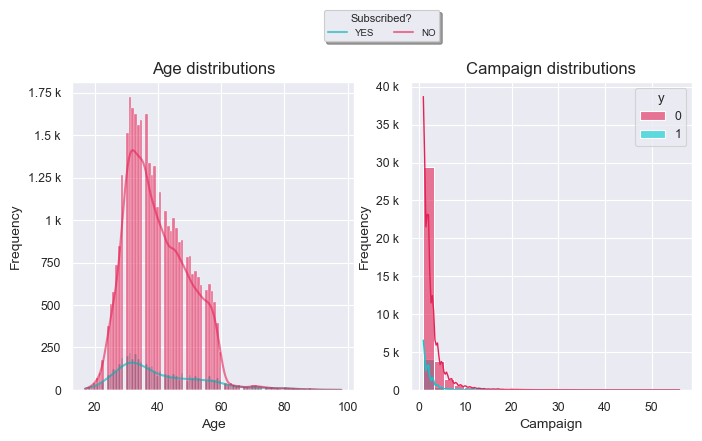

In [230]:
num_distributions('age', 'campaign')

**Duration:** last contact duration, in seconds (numeric). 

**Pdays:** number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

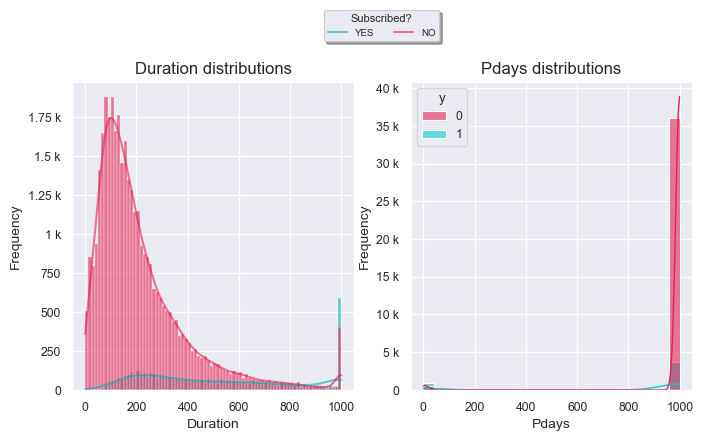

In [231]:
num_distributions('duration', 'pdays')

**Previous:** number of contacts performed before this campaign and for this client (numeric). 0 means the client is new and not contacted in the previous term. There is a small proportion of surge of subscription among the customers who were not contacted before because most of the customers were new.

**Nr.employed:** number of employees - quarterly indicator (numeric)

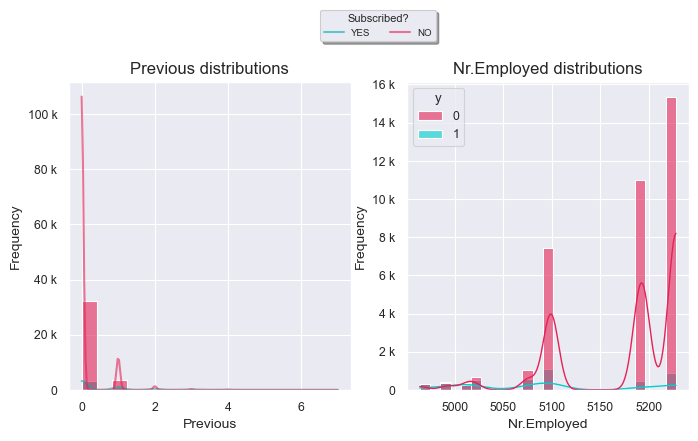

In [232]:
num_distributions('previous', 'nr.employed')

**Emp.var.rate:** employment variation rate - (quarterly indicator) refers to the rate of change in employment levels over a specific period.

**Cons.conf.idx:** Consumer confidence measures how consumers feel (optimistic or pessimistic) about the state of the economy. Put simply, consumer confidence gives economists a window into how people are feeling about the economy. This is generally expressed in how they save and how they spend their money.


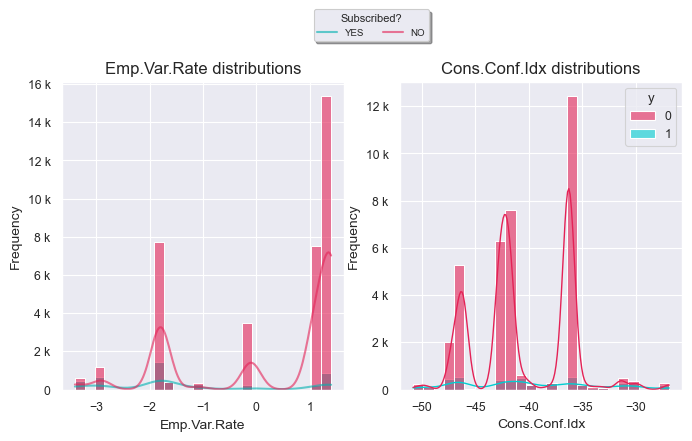

In [233]:
num_distributions ('emp.var.rate', 'cons.conf.idx')

#### euribor3m
Euribor stands for "Euro Interbank Offered Rate." Euribor3m tells the daily interest rate that European banks charge each other to borrow money for 3 months. If the Euribor3m rate goes up, it means borrowing money has become more expensive and in Europe. This could signal a tightening of credit or a less healthy economy. A higher Euribor can incentivize banks to raise deposit rates, but it's not a guaranteed outcome.Traditionally, an increase in Euribor would lead to an increase in deposit rates to attract customers. But, as Eurobor is the interest rate among the bank themselves it might not affect the deposit rates rather depend on other factors,i.e.,if banks already have a lot of cash on hand, they might be less inclined to offer higher deposit rates even with a rising Euribor.

### consumer price index
consumer price index - (monthly indicator), is the instrument to measure inflation. It is used to estimate the average variation between two given periods in the prices of products consumed by households. The consumer price index (CPI) is defined to equal to 100 for the reference base period. Higher rate might encourage people save more to maintain purchasing power in future and lower rate can dicourage saving.

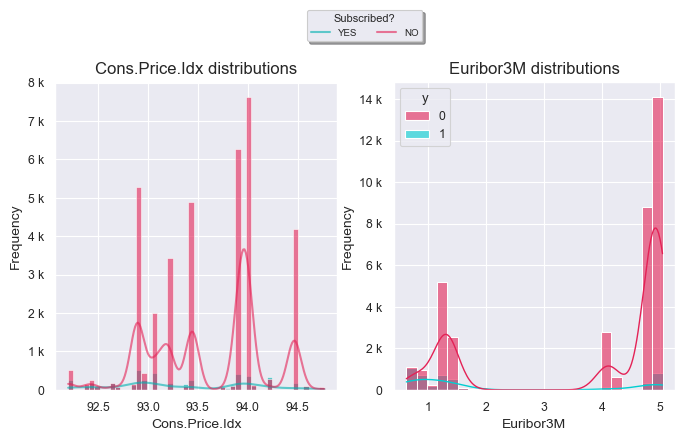

In [234]:
num_distributions('cons.price.idx', 'euribor3m')

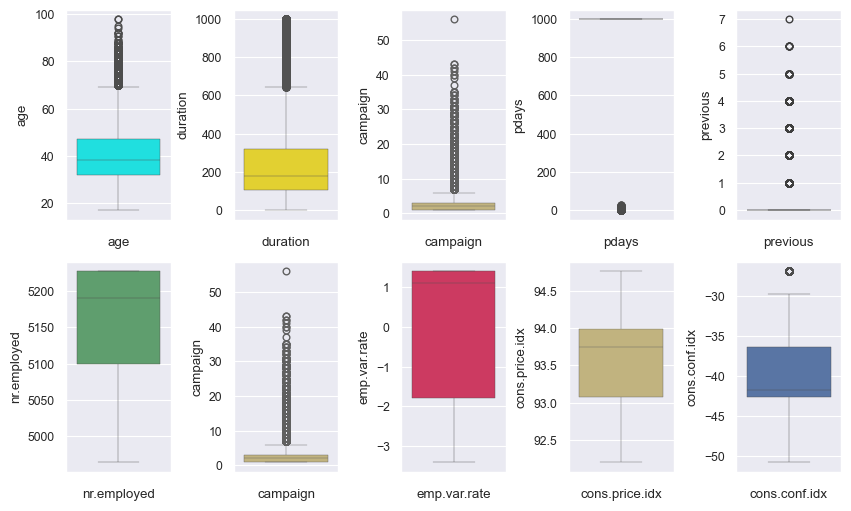

In [235]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(2, 5, figsize=(10, 6))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.6) 
a = sns.color_palette("husl", 9)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['age'], ax=ax[0,0], color='#00ffff',linewidth=0.3)
ax[0,0].set_xlabel('age')
 
# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['duration'], ax=ax[0,1], color='#ffe814',linewidth=0.3)
ax[0,1].set_xlabel('duration')
 
# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['campaign'], ax=ax[0,2], color='y',linewidth=0.3)
ax[0,2].set_xlabel('campaign')
 
# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['pdays'], ax=ax[0,3],linewidth=0.3)
ax[0,3].set_xlabel('pdays')
 
sns.boxplot(data=df['previous'], ax=ax[0,4], color='brown',linewidth=0.3)
ax[0,4].set_xlabel('previous')
 
# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['nr.employed'], ax=ax[1,0], color='g',linewidth=0.3)
ax[1,0].set_xlabel('nr.employed')
 
# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['campaign'], ax=ax[1,1], color='y',linewidth=0.3)
ax[1,1].set_xlabel('campaign')
 
# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['emp.var.rate'], ax=ax[1,2],color='#e42256',linewidth=0.3)
ax[1,2].set_xlabel('emp.var.rate')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['cons.price.idx'], ax=ax[1,3], color='y',linewidth=0.3)
ax[1,3].set_xlabel('cons.price.idx')
 
# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['cons.conf.idx'], ax=ax[1,4],linewidth=0.3)
ax[1,4].set_xlabel('cons.conf.idx')
# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    #subplot.set_xticklabels([])
    ax1.set_xticklabels([])

    # Set x-tick labels on ax2 (second subplot)
    ax2.set_xticklabels([])

    
plt.show()

**Imbalanced dataset** is a dataset where the classes are not balanced or equal. This means there is an unequal number of samples from each target class and some classes may have significantly more samples than others.

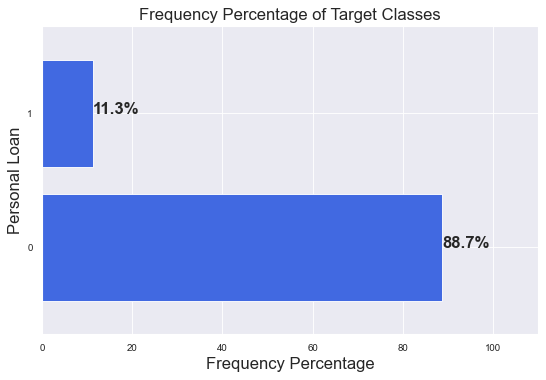

In [236]:
sns.set_palette(['royalblue', 'darkturquoise'])
plt.figure(dpi=80)

# Plot frequency percentages barplot
df['y'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df['y'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

The **default** column don't contribute much to the term prediction because later after the imputation of unknown vlaues it will contain a single variable and **emp.var.rate** is heavily correlated with number of emplyoees (nr.employees) as we seen in the Correlation Matrix that's why removing these two columns.

In [237]:
df = df.drop(['default','emp.var.rate'], axis=1)

In [238]:
X = df.drop('y', axis=1)
y = df['y'] 

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In this dataset, there are an unequal number of samples from each target class and class 0 have significantly more samples than class 1. Thats why, we are dividing the samples randomly in such a way that the proportion of each class remains same across both training and test sets.

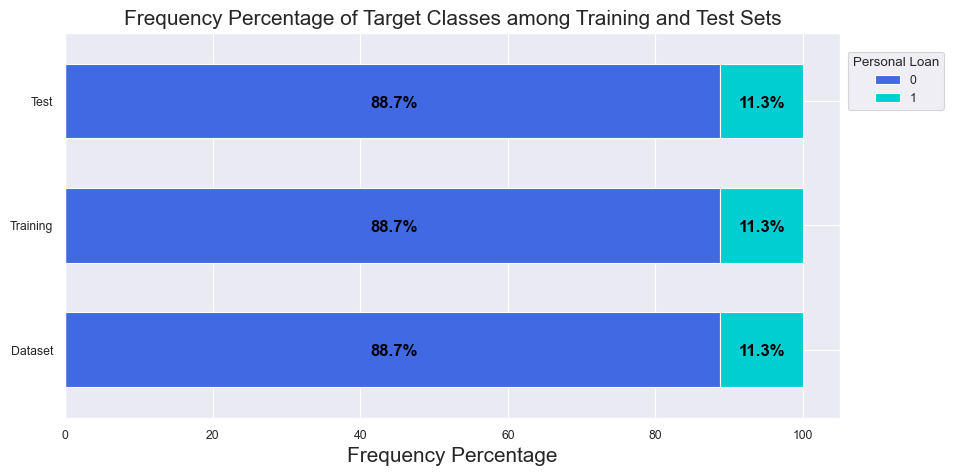

In [240]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Drop-column Feature Importance Implementation</p>

In [241]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

The drop column importance function will calculate the significance of features in the prediction. This funcion firstly determine model performance with all predictors and drop a single predictor then see the reduction in the performance and the reduction in performance is the importance of that function will be calculated.

In [242]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        with parallel_backend('threading',n_jobs = -1):
            model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df  

In [243]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

We will use these functions before building our final model regarding each classification algorithm to detect redundant features.

In [244]:
# feature transformation
df["education"]=df["education"].replace({"basic.9y":"basic","basic.4y":"basic","basic.6y":"basic", "university.degree":"graduate","professional.course":"professional_course"})
df['month'] = df['month'].replace ({'mar':'spring','apr':'spring','may':'spring','jun':'summer','jul':'summer','aug':'summer','sep':'autumn','oct':'autumn','nov':'winter','dec':'winter'})

Now we will implement different algorithms that mostly suits our dataset and give good results. The performance f1 score rarely improves in this dataset for different algorithms though it has been tried to enhance the performace of these models within time constraints.

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Complement NB Model Building</p>

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Complement NB Feature Discretization</p>

In [245]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['age', 'previous', 'campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed','euribor3m','duration']

    # Define the features (X) and the output labels (y) 
    X = df[cols_to_discretize]
    y = df['y']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Define the grid search parameters
    param_grid = {'discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                  'discretizer__n_bins': np.arange(2,11)}

    # Define the KBinsDiscretizer and OneHotEncoder and ComplementNB objects
    discretizer = KBinsDiscretizer(encode='ordinal')
    onehot = OneHotEncoder(handle_unknown='ignore', drop='first')

    # Create the pipeline
    pipeline = Pipeline([('discretizer', discretizer), ('onehot', onehot), ('clf', clf)])

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
    
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best discretization parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Return optimal values for n_bins and strategy
    return grid_search.best_params_['discretizer__n_bins'], grid_search.best_params_['discretizer__strategy']

In [246]:
# Ignore a warning that in some cases, the width of the bins will be too small
warnings.simplefilter(action='ignore')

# Initialize the CNB classifier
cnb = ComplementNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, cnb)

Best discretization parameters: {'discretizer__n_bins': 2, 'discretizer__strategy': 'uniform'}
Best score: 0.5060677595606969


<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Complement NB Feature Encoding</p>

In [247]:
def nb_feature_encoding(df, n_bins, strategy, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features after performing feature discretization 
    considering optimal n_bins and strategy values.
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['age', 'previous', 'campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed','euribor3m']

    # Define the features (X) and the output labels (y) 
    X = df.drop('y', axis=1)
    y = df['y'] 

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Discretize the continuous features
    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    X_train[cols_to_discretize] = discretizer.fit_transform(X_train[cols_to_discretize])
    X_test[cols_to_discretize] = discretizer.transform(X_test[cols_to_discretize])

    # Onehot encode the discretized features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True,dtype= int)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True,dtype=int)
    
    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Return transformed features
    return X_train, X_test

In [248]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['age', 'job','marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Complement NB Feature Subset Selection</p>

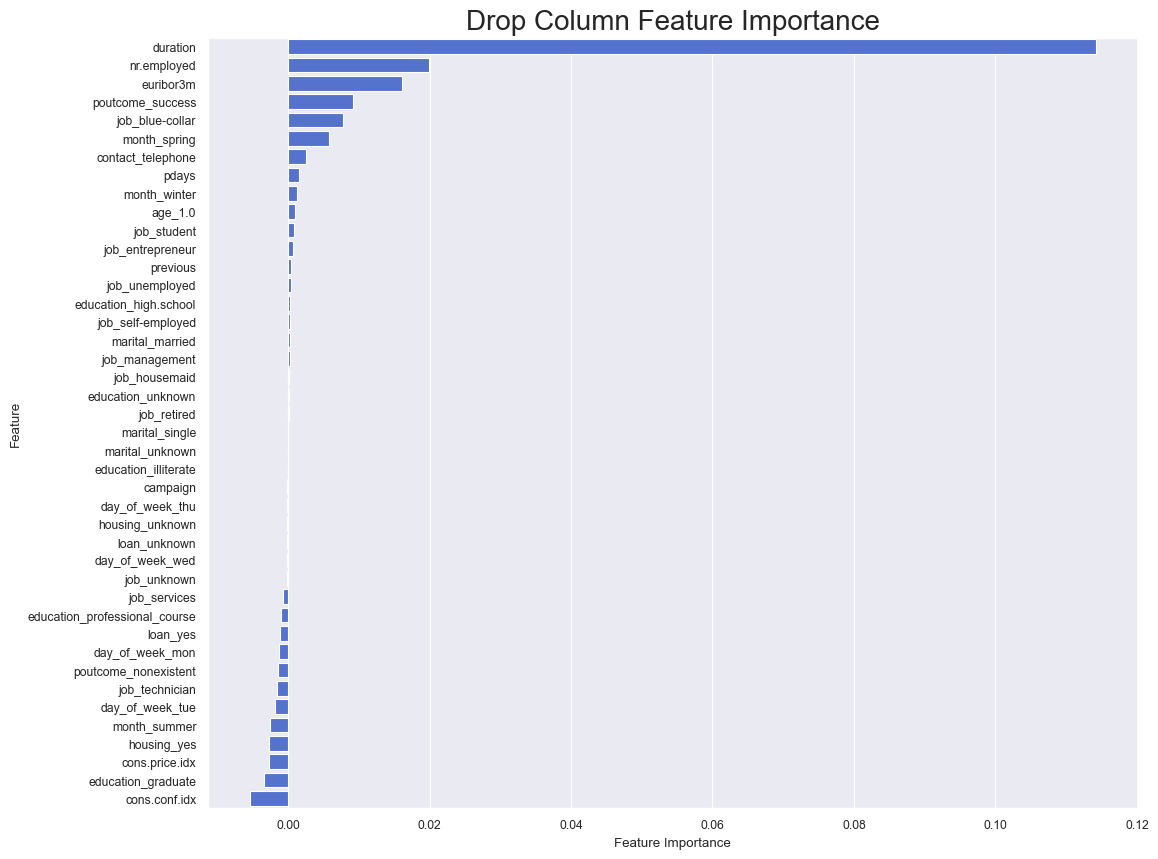

In [249]:
# Initialize the CNB classifier
cnb = ComplementNB()

# Call drop_column_importance_p/'===lot
drop_column_importance_plot(cnb, X_train, y_train)

In [250]:
feature_importances = drop_column_importance(cnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Complement NB Model Building</p>

In [251]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Complement NB Model Evaluation</p>

In [252]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [253]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues_r', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     29230
           1       0.40      0.87      0.55      3710

    accuracy                           0.84     32940
   macro avg       0.69      0.85      0.73     32940
weighted avg       0.92      0.84      0.86     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7307
           1       0.39      0.86      0.53       928

    accuracy                           0.83      8235
   macro avg       0.68      0.84      0.71      8235
weighted avg       0.91      0.83      0.86      8235



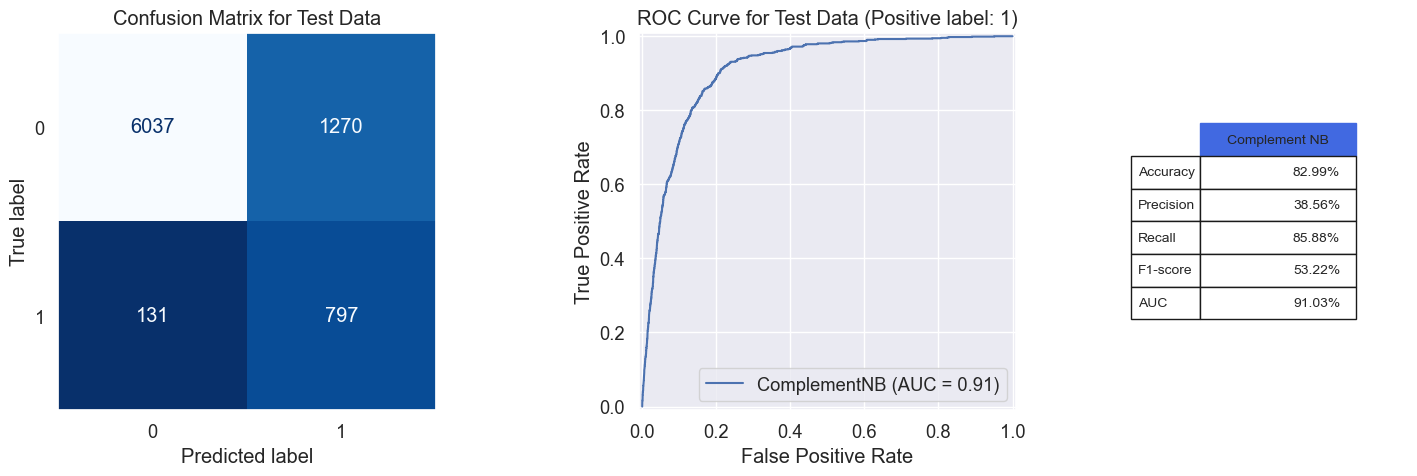

In [254]:
model_evaluation(cnb, X_train, X_test, y_train, y_test, 'Complement NB')

In [255]:
# Save the final performance of Complement Naive Bayes classifier
cnb_output = metrics_calculator(cnb, X_test, y_test, 'Complement Naive Bayes')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Bernoulli NB Model</p>

This algorithm is similar to the multinomial Naive Bayes, but it is used when the data is binary and suitable for discrete data.

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Bernoulli NB Feature Discretization</p>

In [256]:
# Initialize the Categorical NB classifier
bnb = BernoulliNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, bnb)

Best discretization parameters: {'discretizer__n_bins': 5, 'discretizer__strategy': 'uniform'}
Best score: 0.4982277827845228


<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Bernoulli NB Feature Encoding</p>

In [257]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['age', 'job','marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Bernoulli NB Feature Subset Selection</p>

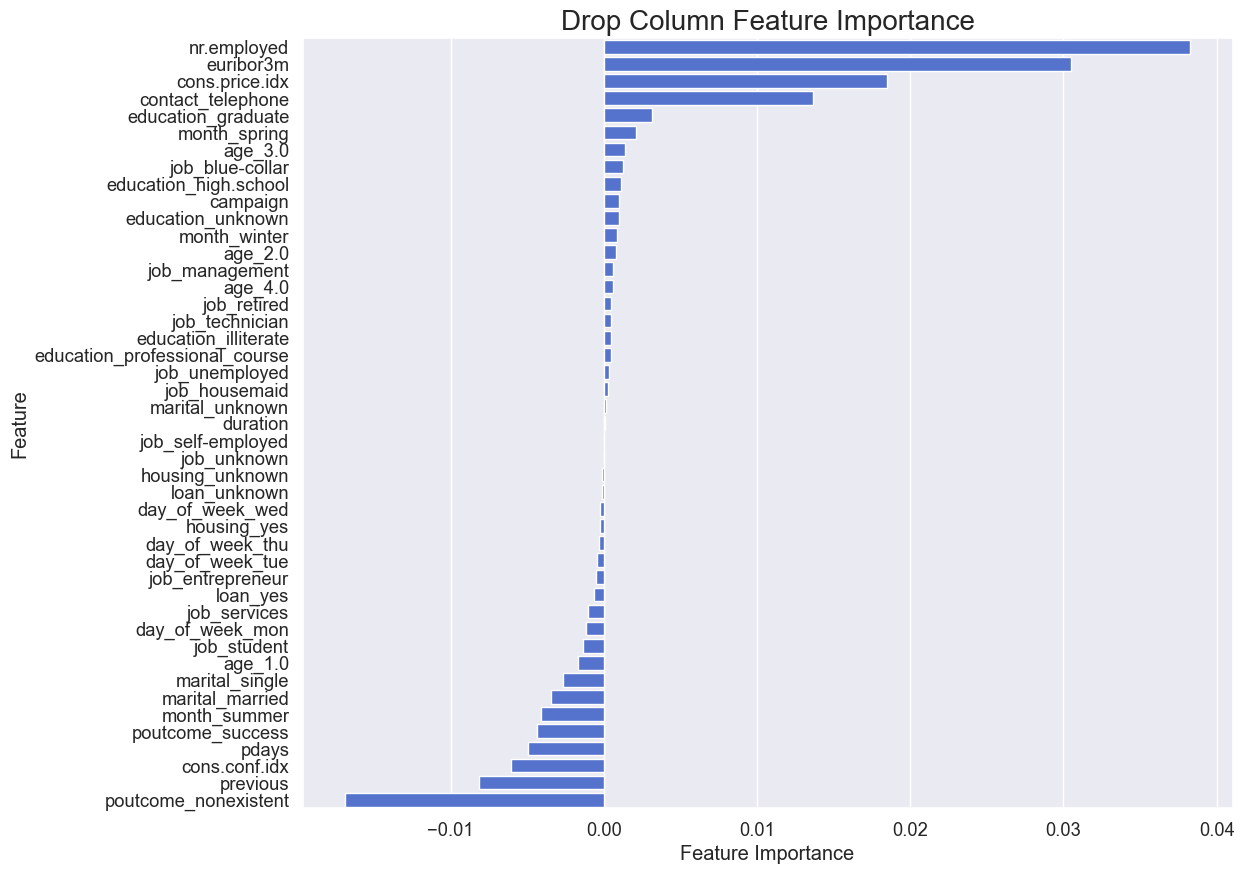

In [258]:
# Call drop_column_importance_plot
drop_column_importance_plot(bnb, X_train, y_train)

In [259]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(bnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Bernoulli NB Model Building</p>

In [260]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:70%; color:white; text-align:center; border-radius:10px 10px; padding:6px">Bernoulli NB Model Evaluation</p>


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29230
           1       0.48      0.40      0.43      3710

    accuracy                           0.88     32940
   macro avg       0.70      0.67      0.68     32940
weighted avg       0.87      0.88      0.88     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7307
           1       0.47      0.39      0.42       928

    accuracy                           0.88      8235
   macro avg       0.70      0.67      0.68      8235
weighted avg       0.87      0.88      0.88      8235



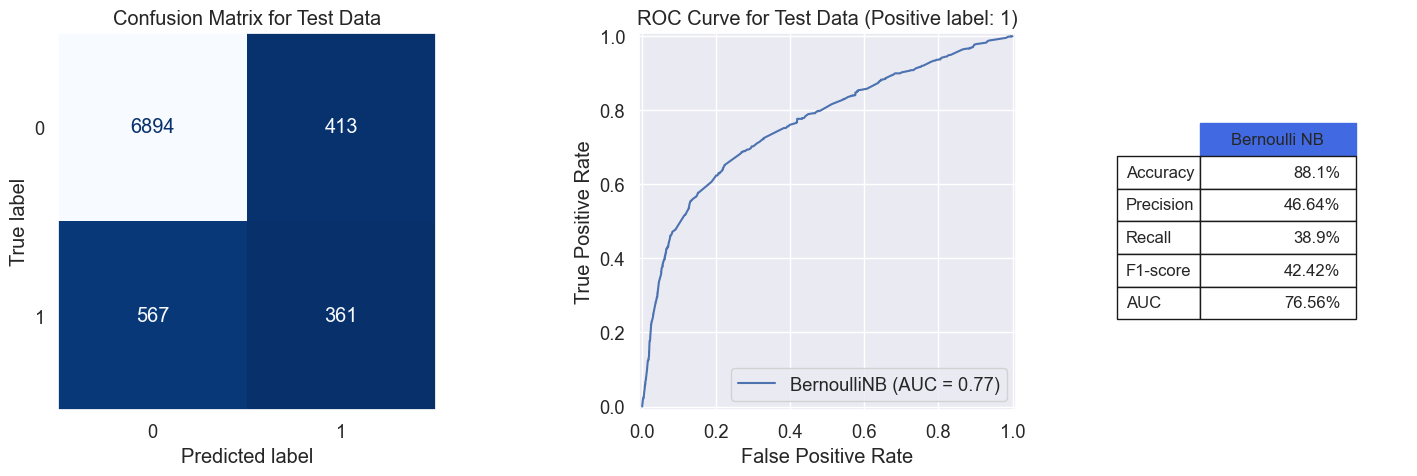

In [261]:
model_evaluation(bnb, X_train, X_test, y_train, y_test, 'Bernoulli NB')

In [262]:
# Save the final performance of Bernoulli Naive Bayes classifier
bnb_result = metrics_calculator(bnb, X_test, y_test, 'Bernoulli Naive Bayes')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Logistic Regression</p>

In [263]:
# Imputation of unknown variables with most_frequent variable
from sklearn.impute import SimpleImputer
def imputer(df):
    df.replace('unknown', np.nan,inplace = True)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_mean.fit(df)
    imp_transformed = imp_mean.transform(df)
    imputed = pd.DataFrame(imp_transformed,columns=df.columns)
    return imputed

In [264]:
dt_df = df.copy()
df = imputer(df)
df = df.astype(dt_df.dtypes)

In [265]:
def nb_feature_encoding(df, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features.
    '''

    # Define the features (X) and the output labels (y) 
    X = df.drop('y', axis=1)
    y = df['y'] 

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    

    # Onehot encode the discrete features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True,dtype= int)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True,dtype=int)
    
    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Return transformed features
    return X_train, X_test

In [266]:
cols_to_encode =['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [267]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [268]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,5)]

# Define hyperparameters grid
param_grid = [{'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'], 
               'C': np.logspace(-5, 5, 5), 
               'class_weight':class_weights}]

In [269]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses 
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects  
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric)
    with parallel_backend('threading',n_jobs = -1):
    # Fit the GridSearchCV object to the training data
        clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [270]:
y_train = y_train.astype('int64')

In [271]:
# Define the base model
logreg = LogisticRegression(max_iter=100,n_jobs=-1)

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters 
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 316.22776601683796, 'class_weight': {0: 0.2505, 1: 0.7495}, 'penalty': 'l1', 'solver': 'liblinear'}


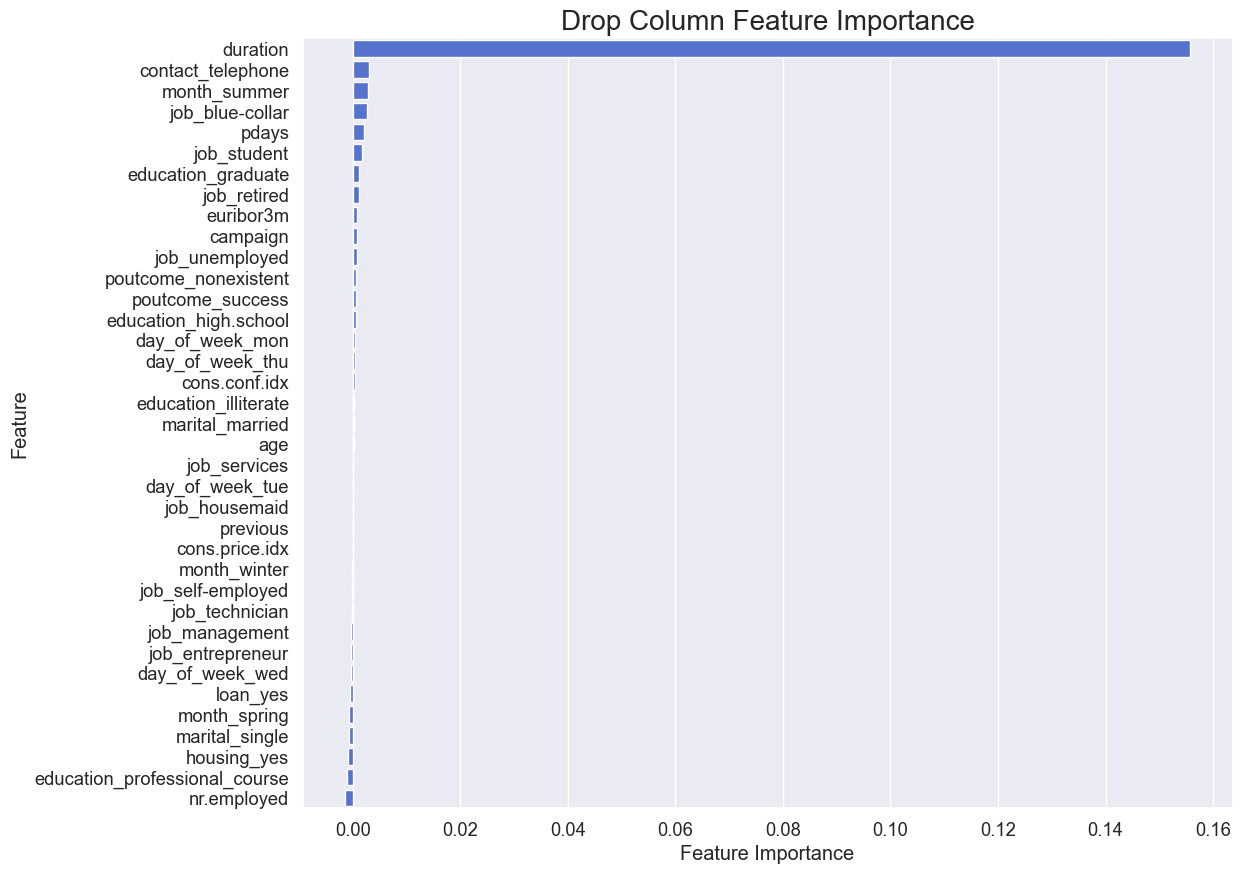

In [272]:
drop_column_importance_plot(logreg_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     29230
           1       0.55      0.71      0.62      3710

    accuracy                           0.90     32940
   macro avg       0.75      0.82      0.78     32940
weighted avg       0.92      0.90      0.91     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7307
           1       0.53      0.70      0.60       928

    accuracy                           0.90      8235
   macro avg       0.74      0.81      0.77      8235
weighted avg       0.91      0.90      0.90      8235



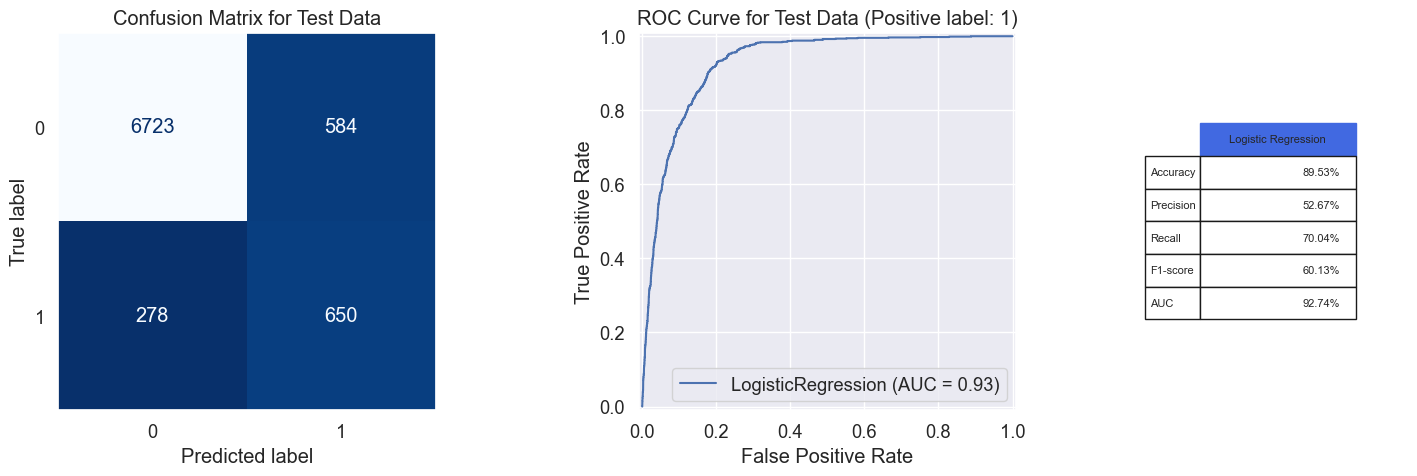

In [273]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

In [274]:
# Save the final performance of Logistic Regression classifier
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">KNeighborsClassifier</p>

In [275]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [276]:
cols_to_encode =['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [277]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [278]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 10), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']}]

In [279]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


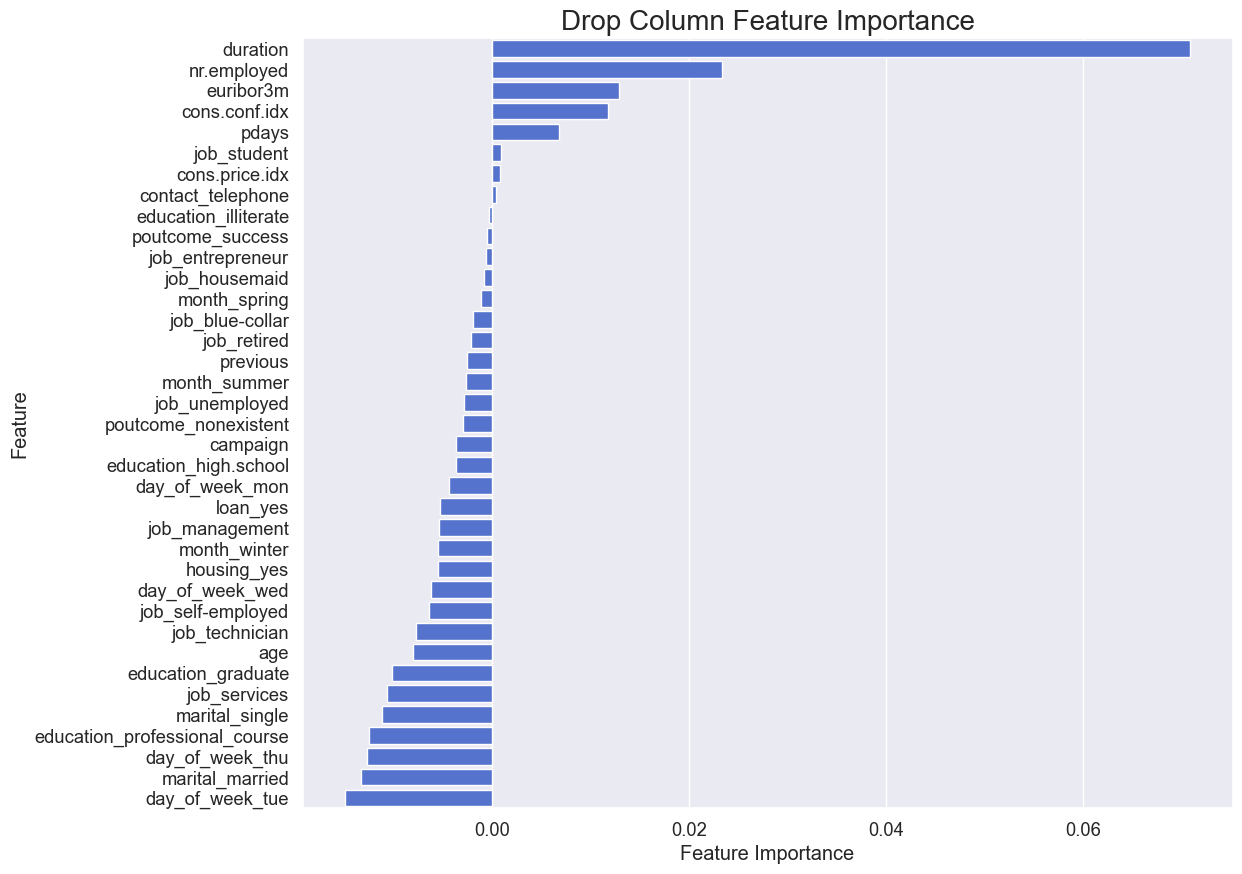

In [280]:
drop_column_importance_plot(knn, X_train, y_train)

In [281]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [282]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29230
           1       0.73      0.58      0.65      3710

    accuracy                           0.93     32940
   macro avg       0.84      0.78      0.81     32940
weighted avg       0.92      0.93      0.93     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7307
           1       0.60      0.49      0.54       928

    accuracy                           0.91      8235
   macro avg       0.77      0.72      0.74      8235
weighted avg       0.90      0.91      0.90      8235



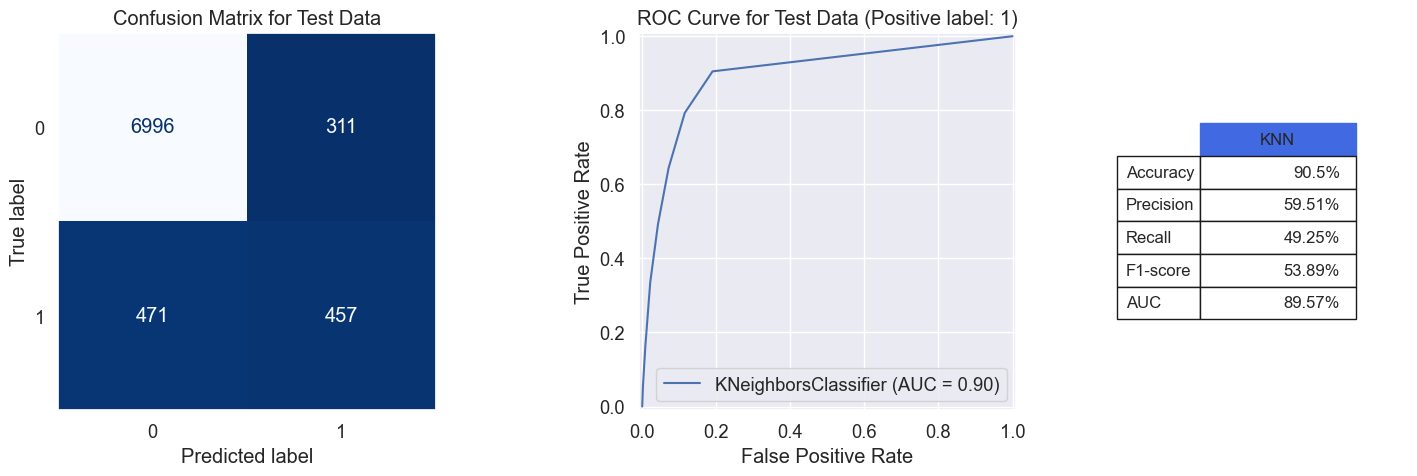

In [283]:
model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

In [284]:
# Save the final performance of KNN classifier
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'K-Nearest Neighbors')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Support Vector Machine</p>

In [285]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [286]:
cols_to_encode =['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [287]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [288]:
# Define the hyperparameter grid to search`
param_grid = [{'kernel': ['rbf'],
               'gamma': [0.03], 
               'C': [0.4],
               'class_weight': [{0: 0.2505, 1: 0.7495}]}]  

In [289]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 0.4, 'class_weight': {0: 0.2505, 1: 0.7495}, 'gamma': 0.03, 'kernel': 'rbf'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     29230
           1       0.53      0.78      0.63      3710

    accuracy                           0.90     32940
   macro avg       0.75      0.84      0.78     32940
weighted avg       0.92      0.90      0.90     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7307
           1       0.51      0.75      0.60       928

    accuracy                           0.89      8235
   macro avg       0.74      0.83      0.77      8235
weighted avg       0.91      0.89      0.90      8235



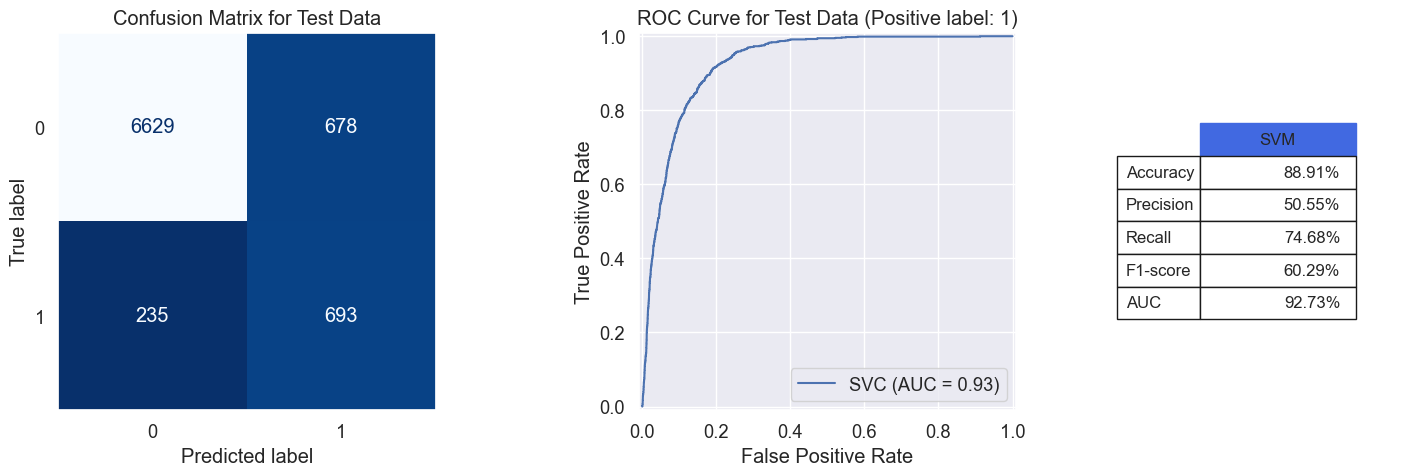

In [290]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')

In [291]:
# Save the final performance of SVM classifier
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Random Forest</p>

In [340]:
cols_to_encode = ['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [363]:
# Build random forest classifier object considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='entropy', max_features=None, bootstrap=True,  n_estimators=120, 
                                  max_depth = 9,  min_samples_leaf=3, min_samples_split=3,
                                  class_weight={0: 0.25, 1: 0.75}, random_state=0,n_jobs = -1)
                             
                            
# Train the final Random Forest model
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=9, max_features=None, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=120, n_jobs=-1,
                       random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     29230
           1       0.61      0.86      0.71      3710

    accuracy                           0.92     32940
   macro avg       0.80      0.89      0.83     32940
weighted avg       0.94      0.92      0.93     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7307
           1       0.55      0.78      0.64       928

    accuracy                           0.90      8235
   macro avg       0.76      0.85      0.79      8235
weighted avg       0.92      0.90      0.91      8235



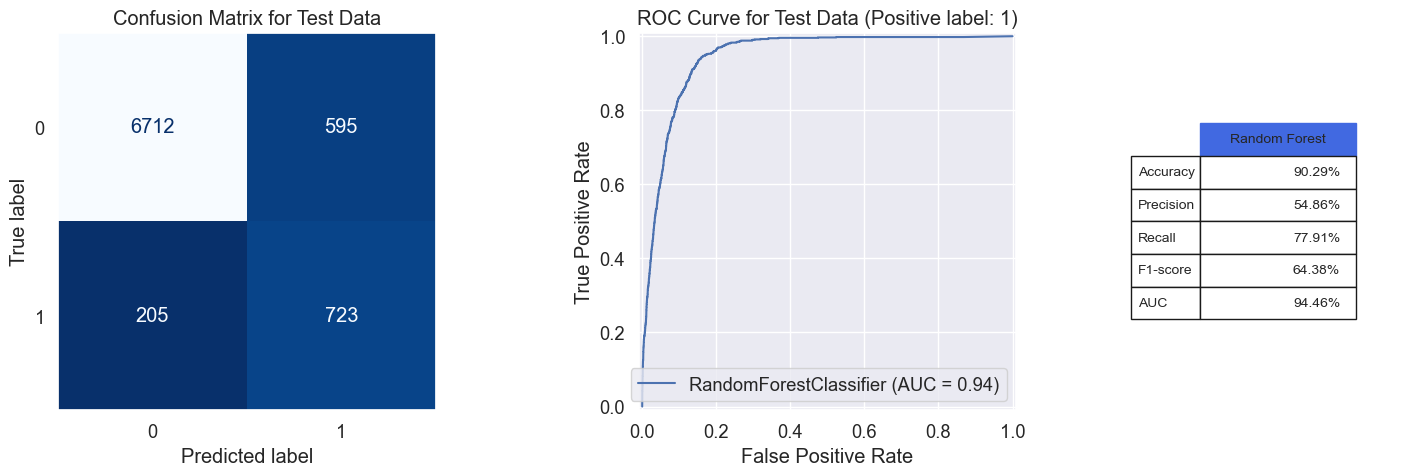

In [364]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

In [365]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">XGBoosting</p>

In [366]:
cols_to_encode =['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [367]:
# Initialize the XGBoost Classifier
xgb_opt = XGBClassifier(max_depth=5,
                    learning_rate=0.05,
                    n_estimators=120,
                    min_child_weight=1,
                    scale_pos_weight=2.5,
                    colsample_bytree=0.9,
                    n_jobs = -1,
                    gamma=0.1,
                    booster='gbtree',
                    objective='binary:logistic',
                    eval_metric='error', 
                    random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     29230
           1       0.58      0.81      0.68      3710

    accuracy                           0.91     32940
   macro avg       0.78      0.87      0.81     32940
weighted avg       0.93      0.91      0.92     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7307
           1       0.55      0.77      0.64       928

    accuracy                           0.90      8235
   macro avg       0.76      0.84      0.79      8235
weighted avg       0.92      0.90      0.91      8235



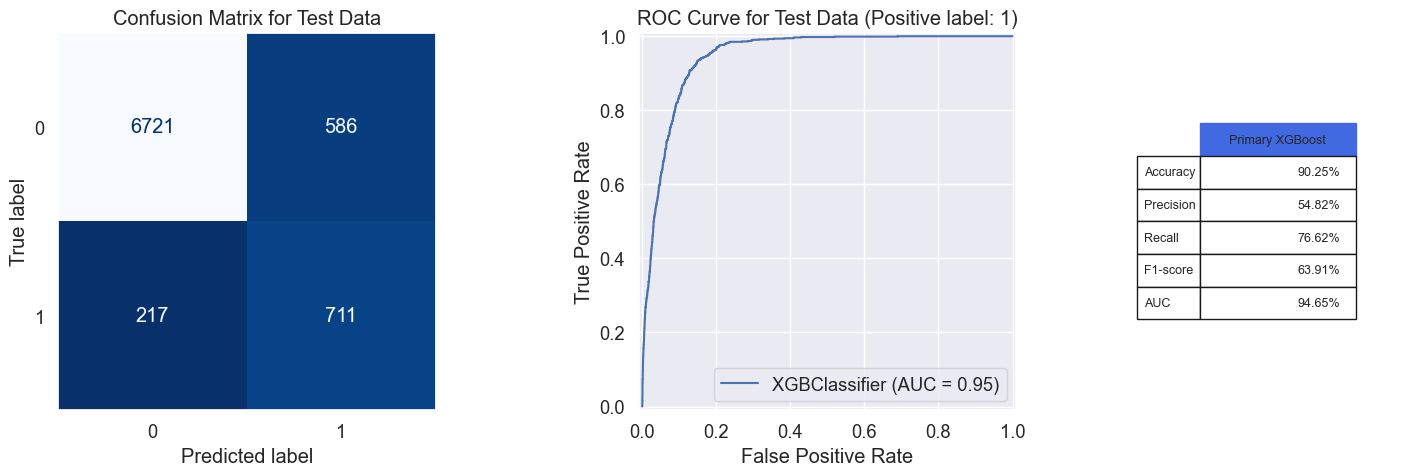

In [368]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'Primary XGBoost')

In [369]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_opt, X_test, y_test, 'XGBoost')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Decision Tree Classifier</p>

In [370]:
cols_to_encode =['job', 'marital', 'education', 'housing','loan','contact', 'month', 'poutcome','day_of_week']
# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, cols_to_encode)

In [391]:
# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(criterion='entropy', max_features=None, 
                                  max_depth = 7,  min_samples_leaf=3, min_samples_split=3,
                                  class_weight={0: 0.25, 1: 0.75}, random_state=0)

# Find the best classifier with the optimal hyperparameters
dt = dt.fit(X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     29230
           1       0.54      0.84      0.65      3710

    accuracy                           0.90     32940
   macro avg       0.76      0.87      0.80     32940
weighted avg       0.93      0.90      0.91     32940


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      7307
           1       0.51      0.80      0.62       928

    accuracy                           0.89      8235
   macro avg       0.74      0.85      0.78      8235
weighted avg       0.92      0.89      0.90      8235



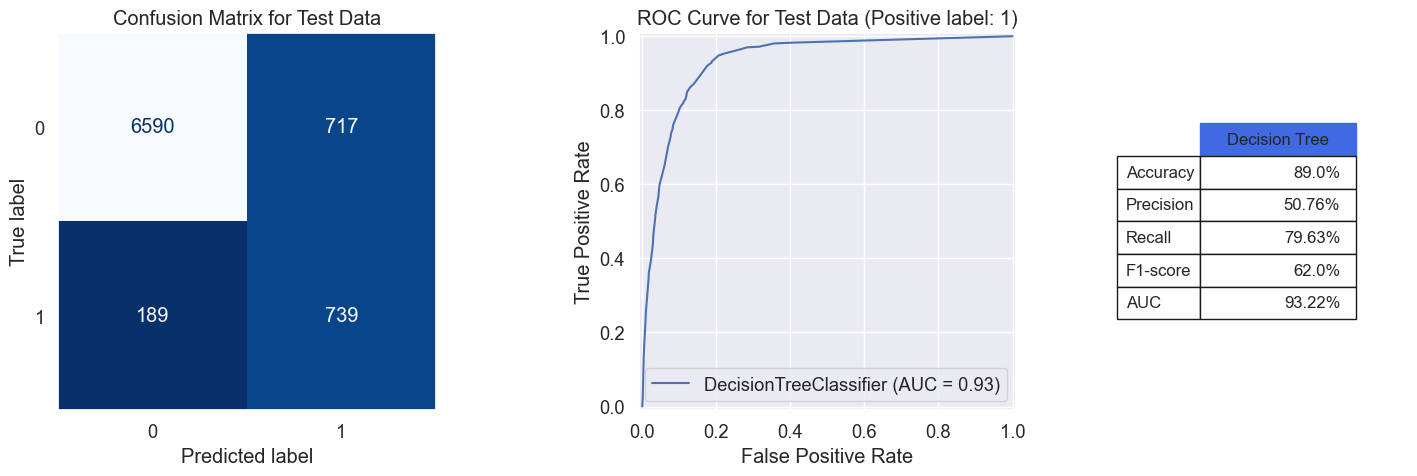

In [392]:
model_evaluation(dt, X_train, X_test, y_train, y_test, 'Decision Tree')

In [393]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt, X_test, y_test, 'Decision Tree')

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:90%; color:white; text-align:center; border-radius:10px 10px; padding:10px">Conclusion</p>

The purpose of this is to predict whether a customer will subscribe a term deposit or not.  The institution would like to develop a classifier that will help them identify the potential customers who are more likely to purchase the loan.    Therefore, we have the most important metric for this project is the f1-score for class '1'. A high f1-score indicates a balance between identifying as many potential loan customers as possible (high recall) and minimizing the number of false positives (high precision). However, for this project we have put more focus on the recall part because we don't want to loose the customer who are likely to subscibe our term deposit. Thats why, the model is receiving false positives to a certain extent. Lastly, by considering the trade off between false positive and false negative we are choosing the Random Forest Model for our production with the highest f1 score for class 1.

In [395]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([cnb_output, bnb_result, logreg_result, knn_result, svm_result,
           rf_result, xgb_result,dt_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='F1-score', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score')

,Accuracy,Precision,Recall,F1-score,AUC
Random Forest,90.29%,54.86%,77.91%,64.38%,94.46%
XGBoost,90.25%,54.82%,76.62%,63.91%,94.65%
Decision Tree,89.0%,50.76%,79.63%,62.0%,93.22%
SVM,88.91%,50.55%,74.68%,60.29%,92.73%
Logistic Regression,89.53%,52.67%,70.04%,60.13%,92.74%
K-Nearest Neighbors,90.5%,59.51%,49.25%,53.89%,89.57%
Complement Naive Bayes,82.99%,38.56%,85.88%,53.22%,91.03%
Bernoulli Naive Bayes,88.1%,46.64%,38.9%,42.42%,76.56%
